In [394]:
import pandas as pd
from collections import Counter
import operator

totaldf = pd.read_csv('totalnew.csv',low_memory=False)
totaldfn = totaldf.reset_index()
totaldf = totaldfn.drop(['index'], axis=1)


df_certified = totaldf[totaldf.CASE_STATUS.isin(['CERTIFIED'])]
df_certified = df_certified[df_certified.VISA_CLASS.isin(['H-1B'])]
Sited = df_certified['WORKSITE_STATE']
Companyd = df_certified['EMPLOYER_NAME']
jobs = df_certified['SOC_CODE']
Site = list(Sited)
Company = list(Companyd)

Site_count = dict(Counter(Site))
Company_count = dict(Counter(Company))
sorted_Site_count = sorted(Site_count.items(), key=operator.itemgetter(1),reverse=True)
sorted_Company_count = sorted(Company_count.items(), key=operator.itemgetter(1),reverse=True)

Counterlist = []
for i in range(5):
    company_name = sorted_Company_count[i][0]
    temjobs = jobs[Companyd==company_name]
    Counterlist.append(Counter(temjobs))
list_jobs = []
for i in range(5):
    temdict = dict(Counterlist[i])
    keys = list(temdict.keys())
    [list_jobs.append(ele) for ele in keys]
list_jobs = list(set(list_jobs))
list_jobs
input_array = np.zeros((5,len(list_jobs)))
for i in range(5):
    temdict = dict(Counterlist[i])
    for j in range(len(list_jobs)):
        if list_jobs[j] not in list(temdict.keys()):
            input_array[i,j]=int(0)
        else:
            input_array[i,j]=int(temdict[list_jobs[j]])
new_list = list_jobs.copy()
for i in range(input_array.shape[1]):
    if sum(input_array[:,i])<10000:
        new_list[i] = 'nan'
new_list = list(set(new_list))
new_input = np.zeros((5,len(new_list)-1))
tem_new = []
for ele in new_list:
    if ele != 'nan':
        tem_new.append(ele)
new_list = tem_new
new_input=np.zeros((5,len(new_list)))
for i in range(5):
    temdict = dict(Counterlist[i])
    for j in range(len(new_list)):
        if new_list[j] not in list(temdict.keys()):
            new_input[i,j]=int(0)
        else:
            new_input[i,j]=int(temdict[new_list[j]])
new_list_name = []
jobs_name = df_certified['SOC_NAME']
for name in new_list:  
    tem = list(jobs_name[jobs==name])[0]
    new_list_name.append(tem)
new_list_name.append('other')
otherss = [] 
for i in range(5):
    temvalue = sum(input_array[i]) -sum(new_input[i])
    otherss.append(temvalue)
new_input_new = np.concatenate((new_input,np.array(otherss).reshape(-1,1)),axis = 1)

In [407]:
import pandas as pd
import numpy as np
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf

plotly.tools.set_credentials_file(username='Lanceljc', api_key='9om7ohKNz7yvpYZ7ehlJ')
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

df = pd.DataFrame(new_input_new, columns=new_list_name)
df.iplot(kind='barh',barmode='stack', bargap=.1)#, filename='cufflinks/barh')


In [336]:
Salary = df_certified['PREVAILING_WAGE']
Salary = Salary[df_certified['PW_UNIT_OF_PAY']=='Year']
Salary = Salary.iloc[:].str.replace(',', '').astype(float)
Salary_dict = dict(Counter(Salary))


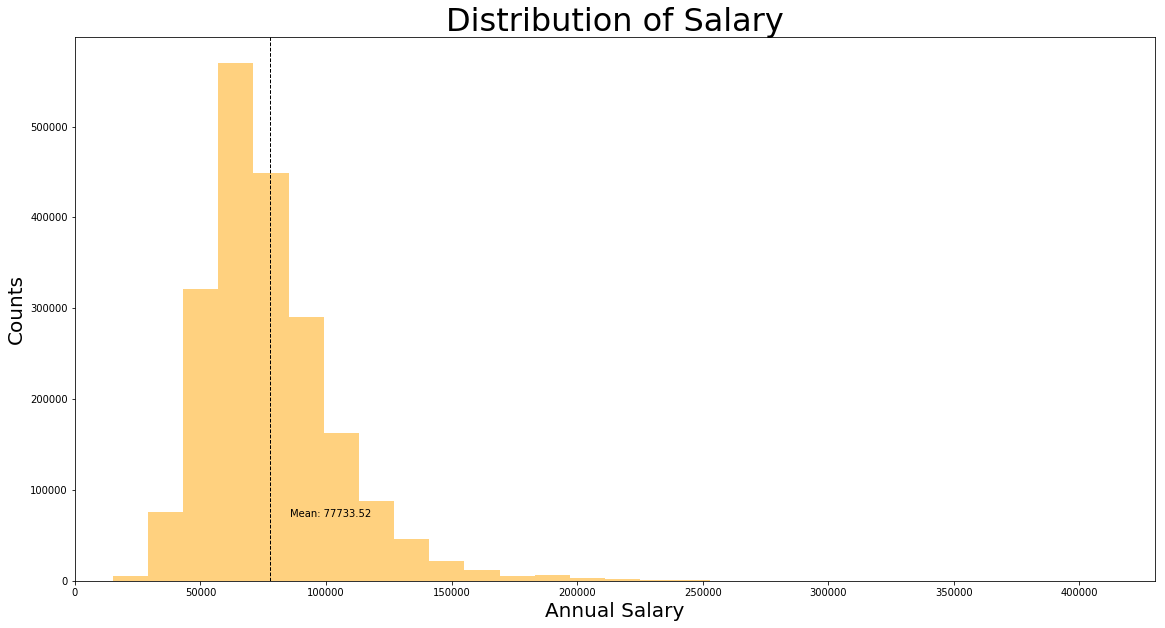

In [405]:
import matplotlib.mlab as mlab
x = list(Salary)
 
num_bins = 40
plt.figure(figsize=(20,10))
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, facecolor='orange', alpha=0.5)
 
# add a 'best fit' line
plt.xlabel('Annual Salary',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.title(r'Distribution of Salary',fontsize=32)
plt.axvline(sum(x)/len(x), color='k', linestyle='dashed', linewidth=1)
plt.xlim((0, 430000))
plt.text(sum(x)/len(x) + sum(x)/len(x)/10, 
         sum(x)/len(x) - sum(x)/len(x)/10, 
         'Mean: {:.2f}'.format(sum(x)/len(x)))
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [408]:
aa = list(range(0,430000,5000))
bb = list(range(5000,430000+5000,5000))
new_ran = []
for ind in range(len(aa)):
    new_ran.append((aa[ind],bb[ind]))

[0, 0, 0, 492, 1257, 4199, 11620, 28887, 55564, 90085, 129862, 181011, 220815, 200807, 191439, 163338, 131251, 112468, 115137, 76857, 62483, 52371, 51786, 32528, 29382, 16958, 21016, 14148, 9292, 7424, 6677, 5686, 4354, 3685, 1956, 1571, 1359, 3895, 986, 1087, 826, 1443, 638, 468, 527, 552, 345, 235, 275, 284, 149, 127, 78, 85, 75, 46, 83, 35, 37, 74, 32, 4, 2, 9, 7, 7, 5, 6, 5, 8, 5, 2, 0, 0, 0, 0, 2, 0, 4, 3, 1, 0, 8, 0, 0, 0]


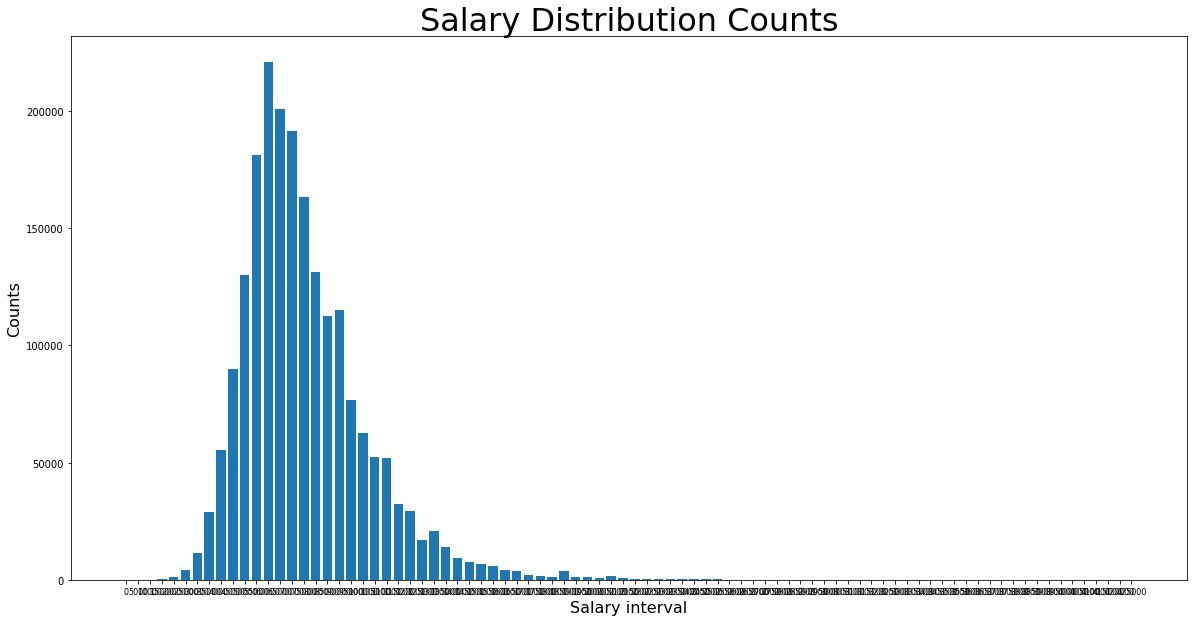

In [306]:
sorted_Salary = sorted(Salary_dict.items(), key=operator.itemgetter(1),reverse=True)
rangelist = [(0,40000),(40000,50000),(50000,60000),(60000,70000),(70000,80000),(90000,100000),(100000,110000),(110000,120000),
            (120000,130000),(130000,140000),(150000,420000)]
rangelist = new_ran
    
salary_count = []
for rangenumber in rangelist:
    tems = Salary[Salary>rangenumber[0]]
    temvalue = sum(tems<rangenumber[1])
    salary_count.append(temvalue)
import matplotlib.pyplot as plt
print(salary_count)
Dic = dict(zip(rangelist,salary_count))

plt.figure(figsize=(20,10))
plt.title('Salary Distribution Counts',fontsize=32)
plt.bar(range(len(Dic)), list(Dic.values()), align='center')
plt.xticks(range(len(Dic)), aa,fontsize=8)
plt.xlabel('Salary interval',fontsize=16)
plt.ylabel('Counts',fontsize=16)
plt.show()


In [222]:
jobs_count = dict(Counter(jobs))
sorted_jobs_count = sorted(jobs_count.items(), key=operator.itemgetter(1),reverse=True)
dict(sorted_jobs_count)
jobs_id = list(dict(sorted_jobs_count).keys())
jobs_name_list = []
i=0
for name in jobs_id:  
    i+=1
    if i>40:break
    if i%50 ==0 :print(i)
    tem = list(jobs_name[jobs==name])[0]
    jobs_name_list.append(tem)
    

In [235]:
Company = totaldf[totaldf.VISA_CLASS.isin(['H-1B'])]['EMPLOYER_NAME']
jobs_c = totaldf[totaldf.VISA_CLASS.isin(['H-1B'])]['SOC_NAME']
Status = totaldf[totaldf.VISA_CLASS.isin(['H-1B'])]['CASE_STATUS']



In [264]:
precent =[]
precent_job = []
number =[]
top_com_list = []
accecpted = []
denied = []
one = []
other =[] 
for i in range(10):
    jobname = jobs_name_list[i]
    cor_company = Company[jobs_c==jobname]
    tem_count = dict(Counter(list(cor_company)))
    sorted_tem_count = sorted(tem_count.items(), key=operator.itemgetter(1),reverse=True)
    top_com = sorted_tem_count[0][0]
    top_com_list.append(top_com)
    top_com_state = Status[Company == top_com]
    number_c = sum(top_com_state=='CERTIFIED')
    rate_c = number_c/(sum(top_com_state=='DENIED')+number_c)
    accecpted.append(number_c)
    denied.append(sum(top_com_state=='DENIED'))
    top_com_job_state = jobs_c[Company == top_com]
    rate_j = sum(top_com_job_state==jobname)/len(top_com_job_state)
    one.append(sum(top_com_job_state==jobname))
    other.append(sum(top_com_job_state!=jobname))
    number.append(number_c)
    precent.append(rate_c)
    precent_job.append(rate_j)

In [340]:
import plotly.graph_objs as go

N = len(accecpted)
x = jobs_name_list[:N]#np.linspace(1, N, N)
y = np.array(accecpted)
x2 = top_com_list
y2 = np.array(denied)
for i in range(N):
    x[i]=x[i]+'/// '+top_com_list[i]
df = pd.DataFrame({'x': x, 'y': y, 'y2':y2})
df.head()

data = [
    go.Bar(
        x=df['x'], # assign x as the dataframe column 'x'
        y=df['y']
    ),
    go.Bar(
        x=df['x'],
        y=df['y2']
    )
]

layout = go.Layout(
    barmode='stack',
    title='Stacked Bar with Pandas'
)

fig = go.Figure(data=data, layout=layout)

# IPython notebook
py.iplot(fig, filename='pandas-bar-chart-layout')

#url = py.plot(data, filename='pandas-bar-chart-layout')